# Titanic Report - Python 3

### Introduction 

This project is part of a Udacity nanodegree in data analysis. In this report I use Python, Numpy, Pandas, and Pyplot to investigate [this dataset](https://www.kaggle.com/c/titanic/data) of Titanic passengers provided by Kaggle. 

This report aims to determine factors that effected survival rates during the sinking of the Titanic in April of 1912. Data provided in the raw dataset are outlined below.

PassengerId - Integer corresponding to the passenger number

Survived - 1 = survived, 0 = died

Pclass - 1, 2, or 3 corresponding to 1st, 2nd, or 3rd class

Name - Name of passenger

Sex - 'male' or 'female'

Age - Age in years; fractional if less than one

SibSp - Number of siblings/spouses aboard
    * Sibling is defined as a Brother, Sister, Stepbrother, or Stepsister
    
Parch - Number of parents/children aboard
    * Child is defined as a Son, Daughter, Stepson, or Stepdaughter
    
Ticket - Ticket number

Fare - Ticket price

Cabin - Cabin number 

Embarked - Embarkation port
    * C = Cherbourg, Q = Queenstown, S = Southampton



The questions I will attempt to answer in this project are all related to survival rate.
1. How did cabin class and gender impact survival rate?
2. Did passenger age significantly change survival rate?
3. How did having siblings on board impact survival rate?

**Please run this notebook using Python 3**

### Data Wrangling

Before doing any analysis it is important to check the data to make sure it is not obviously incorrect. This data set was provided by Kaggle and has been used in over 6000 submissions to their site. Because of this it is safe to assume that the data, in general, will be reliable. However, it is still important to check for missing values and alter columns where appropriate.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Makes plots show up in notebook
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

The counts of entries in the titanic data file show missing values in the Age, Cabin, and Embarked columns. The Cabin and Embarked data isn't useful for my analysis. In the age column these NaN values will be allowed; however, the fact that data is missing should be considered when drawing conclusions. 

In this dataset, ages below one are represented as fractions. Changing these ages to 0 will make grouping the data easier.

In [4]:
titanic_data.ix[titanic_data.Age < 1, 'Age']  = 0

Since the number of siblings on board and cabin class columns will be used later in this analysis, the size of these groups should be looked at to see if they make sense.

In [5]:
titanic_data.groupby('SibSp').size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [6]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

These columns look correct so no further manipulation is necessary.

### Question 1

#### How did cabin class and gender effect survival rate?

In [7]:
def percent_survived(xs):
    total_survived = xs.sum()
    return total_survived/xs.count()

grouped_data_class = titanic_data.groupby('Pclass')

grouped_first_class = grouped_data_class.get_group(1).groupby('Sex')
grouped_second_class = grouped_data_class.get_group(2).groupby('Sex')
grouped_third_class = grouped_data_class.get_group(3).groupby('Sex')

percent_sex_first = grouped_first_class['Survived'].apply(percent_survived)
percent_sex_second = grouped_second_class['Survived'].apply(percent_survived)
percent_sex_third = grouped_third_class['Survived'].apply(percent_survived)

percent_men = (percent_sex_first['male'], percent_sex_second['male'], \
               percent_sex_third['male'])
percent_female = (percent_sex_first['female'], percent_sex_second['female'], \
               percent_sex_third['female'])

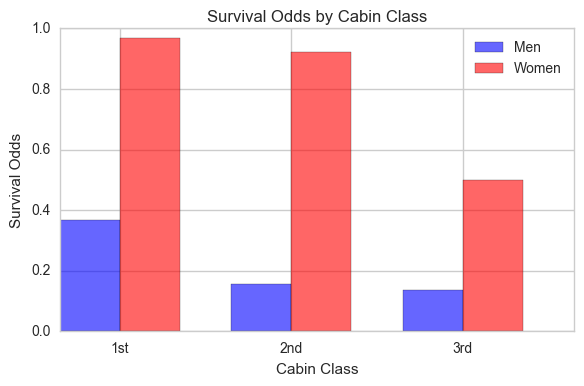

In [8]:
#Plotting
sns.set(style="whitegrid")

n_groups = 3

fig, ax = plt.subplots(figsize=(6, 4))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.6

rects1 = plt.bar(index, percent_men, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Men')

rects2 = plt.bar(index + bar_width, percent_female, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Women')

plt.xticks(index + bar_width, ('1st', '2nd', '3rd'))
plt.legend()

plt.ylabel('Survival Odds')
plt.xlabel('Cabin Class')
plt.title('Survival Odds by Cabin Class')


plt.tight_layout()
plt.show()

The chart above shows decreasing survival rate with increasing cabin class for men and women. Gender can be seen as making a bigger impact than cabin class; women in third class were more likely to survive than men in first class. The decrease in cabin class from first to second class impacts men more than women. However, the decrease in cabin class from second to third impacts women more than men. This could be because passengers in third class were locked in their quarters and were not allowed the chance to survive.

### Question 2

#### How did age effect survival rate?

The survival data for different ages on board can be visualized with a seaborn kernel density plot.

//anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


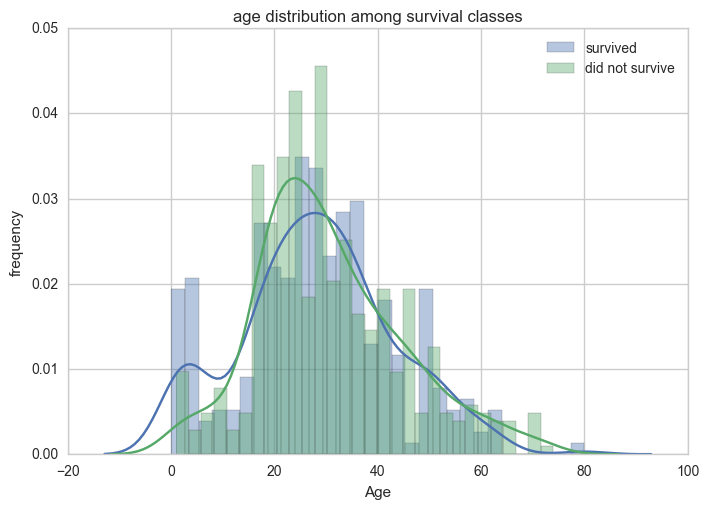

In [9]:
survived_ages = titanic_data.loc[(titanic_data['Survived'] == 1) & \
                                 (~titanic_data['Age'].isnull()), 'Age']
non_survived_ages = titanic_data.loc[(titanic_data['Survived'] == 0) & \
                                    (~titanic_data['Age'].isnull()), 'Age']
sns.distplot(survived_ages, bins=30)
sns.distplot(non_survived_ages, bins=30)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['survived', 'did not survive']);

It can be seen in the graph above that there is a spike in the distribution suggesting young people had a significantly better chance to survive the sinking. A statistical test can be conducted to see if being 10 or under had a significant impact on survival rate.

#### Did being 10 or younger significantly increase survival rate?

For this question I will calculate a one-sample z-test for passenger survival rate of passengers 10 years old and younger. Since population parameters are known, a z-test is better than a t-test.

Our null hypothesis for this test is that being 10 or under did not significantly increase survival rate, the alternative hypothesis is that it did significantly increase survival rate. This test is conducted using a significance level of p < 0.05. This should be a one tailed test because it can be seen from the graph above that being younger increased survival rate.

H<sub>0</sub>: μ<sub>P</sub> = μ<sub>C</sub>

H<sub>A</sub>: μ<sub>P</sub> < μ<sub>C</sub>

In [10]:
grouped_ages = titanic_data.groupby('Age')
percent_by_age = grouped_ages['Survived'].apply(percent_survived)
st_dev = percent_by_age.std(ddof=0)
mean_old = percent_by_age[:10].mean()
age_counts = grouped_ages['Age'].size()
sample_size = age_counts[:10].sum()
z_score = mean_old / (st_dev / np.sqrt(sample_size))
print('The one sample z-test calculed a z-score of', np.round(z_score, 4))

The one sample z-test calculed a z-score of 15.3304


In [11]:
import scipy.stats as st
print("Odds of getting this z-score: ", st.norm.sf(z_score).round(4))

Odds of getting this z-score:  0.0


The probability of getting a z-score of 15.3304 is rounded to p = 0.0, meaning this result is likely to never occur due to chance. Because 0.0 is less than the significance level used for this test of p < 0.05, the null hypothesis is rejected. Being 10 or younger significantly improves survival chances.

#### Did being over retirement age significantly change survival rate?

Unlike passengers under 10, passengers 65+ do not show a noticeable spike in the kernel density plot. Being 65+ could increase or decrease survival chances. Older passengers may have been more likely to get on a lifeboat and survive; however, they may have been weaker swimmers than the younger passengers. Because being 65+ could either increase or decrease survival odds, this z-test will be a two tailed test.

H<sub>0</sub>: μ<sub>P</sub> = μ<sub>R</sub>

H<sub>A</sub>: μ<sub>P</sub> ≠ μ<sub>R</sub>

In [12]:
grouped_ages = titanic_data.groupby('Age')
percent_by_age = grouped_ages['Survived'].apply(percent_survived)
st_dev = percent_by_age.std(ddof=0)
mean_old = percent_by_age[65:].mean()
age_counts = grouped_ages['Age'].size()
sample_size = age_counts[65:].sum()
z_score = mean_old / (st_dev / np.sqrt(sample_size))
print('The one sample z-test calculed a z-score of', np.round(z_score, 4))

The one sample z-test calculed a z-score of 1.5859


A positive score on this test indicates being 65+ made you more likely to survive, but doesn't mean the difference in survival rate is statistically significant.

In [13]:
print("Odds of getting this z-score: ", st.norm.sf(z_score).round(4))

Odds of getting this z-score:  0.0564


Calculating the probability of getting a z-score of 1.5859 gets a probability of p = 0.0564. The significance level for the alternative hypothesis was p < 0.05 so the null hypothesis is accepted, being 65+ does not significantly impact survival rate.

### Question 3

#### How did having siblings on board impact survival rate?

For this question, children are defined as being 16 years old or younger.

Children could be more or less likely to survive if they are without other siblings. If parents had multiple children on board it may have been harder to rescue them both. However, if there were multiple children the children could help each other escape.

In [14]:
def plot_pie(data, loc, title):
    labels = 'Survived', 'Died'

    grouped_by_survival = data.groupby('Survived')
    
    survived = len(grouped_by_survival.get_group(1))
    died = len(grouped_by_survival.get_group(0))
    
    sizes = [survived, died]
    colors = ['green', 'red']
    explode = (0.1, 0)  # explode 1st slice
    plt.subplot(loc)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(title, fontsize=24)
    plt.axis('equal')

In [15]:
only_children = titanic_data.loc[(titanic_data['SibSp'] == 0) & \
                                 (titanic_data['Age'] <= 16)]
children_with_siblings = titanic_data.loc[(titanic_data['SibSp'] != 0) & \
                                          (titanic_data['Age'] <= 16)]

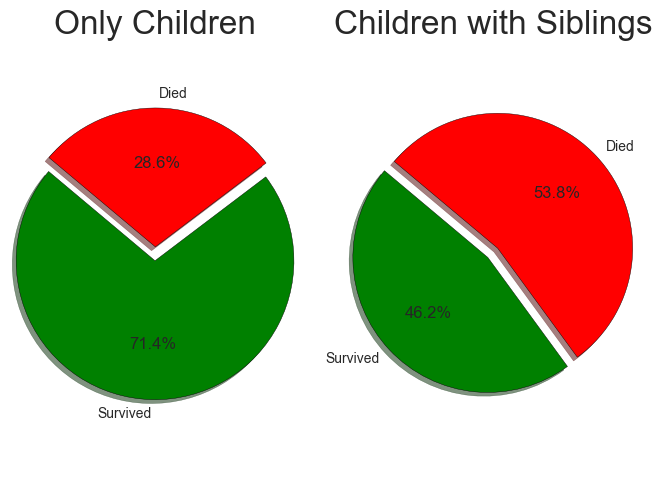

In [16]:
plot_pie(only_children, 121, "Only Children")
plot_pie(children_with_siblings, 122, "Children with Siblings")
plt.show()

The graph above shows that children with siblings were 25.2% more likely to die. Only children had over a 70% chance to survive, while over half the children without siblings died.

# Conclusions

This report highlights some of the factors that effected survival rates during the Titanic sinking. It can be shown statistically that young children 10 and under were significantly more likely to survive than the rest of the ship. Visualizing survival rates based on cabin class and gender show that both were likely contributing factors. Men’s survival rate decreased over 50% from first to second class. Women in third class were more likely to survive than men in first class. Visualizing survival rates of children with and without siblings show that survival rates decreased when children had other siblings on board. 

The data used in this report is not complete. For this data set there are 891 rows of passenger data, the Titanic was carrying 1,317 passengers when it sunk. The passenger data acquired from Kaggle was part of a training set for a machine learning competition. Kaggle split up the data randomly so the data set used here is a random sample of 68% of the total passengers.

When doing this analysis there were some missing features that could have helped when exploring questions. Knowing the genders and ages of siblings on board would allow separation of children with much older siblings, and siblings of opposite gender. This would allow further exploration into how siblings affected survival rate. Would older siblings be an extra help and the child more likely to survive than if they had no siblings? Did boys with sisters have a significantly less likely chance to survive compared to if they had no siblings? 

Some findings in this report are very conclusive, a z-score of 15.3 shows that being 10 or under was a significant factor in determining survival rates. Tests showing the difference in survival of children with or without siblings, and survival of people 65+ are less conclusive. Furthermore, since the Titanic sinking is a single event, it is unclear how these findings will relate to future ships sinking.